<a href="https://colab.research.google.com/github/Valengaob/Biose-ales/blob/main/ParcialFinal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Punto 5 y 6

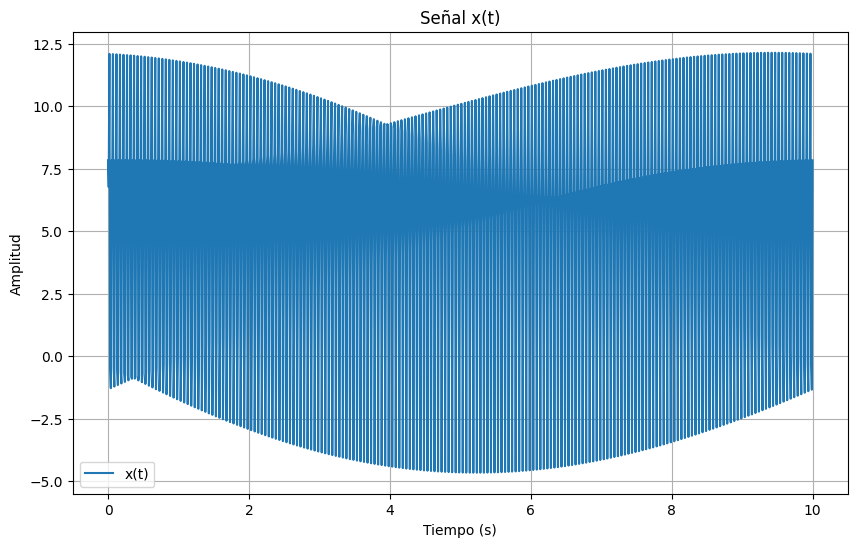

Muestras de la señal x(t):
[ 7.82842712  6.75950021 12.08760657 -0.38781326 -1.28288763  7.83036225
  6.77931175 12.07928555 -0.46269983 -1.2211152   7.83185402  6.79952056
 12.07025782 -0.53714634 -1.15903307  7.83290666  6.82012479 12.06052115
 -0.6111446  -1.09664959]


In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros
a = 2
k = 2 * (a + 1)  #k = 6
t_end = 10
f1 = 40  # Frecuencia de coseno (80pirad/s= 40 Hz)
f2 = 20  # Frecuencia de seno (40pirad/s= 20 Hz)

# Frecuencia de muestreo debe ser mayor al doble de la máxima frecuencia: 40 Hz)
fs = 100  #
t = np.linspace(0, t_end, int(fs * t_end))  # Vector de tiempo
x_t = 4 * np.cos(80 * np.pi * t + (np.pi / 4)) + k * np.sin(40 * np.pi * t) + 5

plt.figure(figsize=(10, 6))
plt.plot(t, x_t, label="x(t)")
plt.title("Señal x(t)")
plt.xlabel("Tiempo (s)")
plt.ylabel("Amplitud")
plt.grid(True)
plt.legend()
plt.show()

print("Muestras de la señal x(t):")
print(x_t[:20])



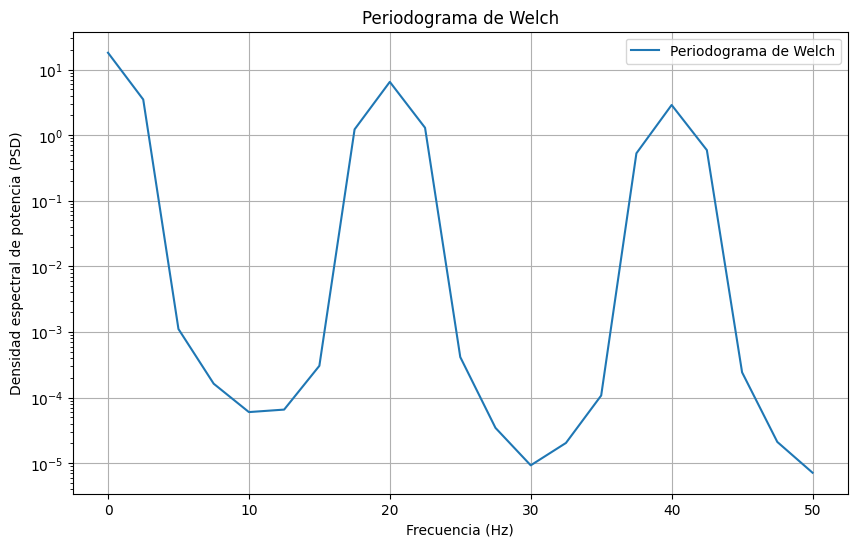

In [12]:
def welch_custom(x, fs, M, S, window_type='hamming'):
    """
    Implementación del periodograma de Welch.

    Parámetros:
    - x: Señal de entrada (array).
    - fs: Frecuencia de muestreo (Hz).
    - M: Número de muestras por segmento.
    - S: Solapamiento entre segmentos (en muestras).
    - window_type: Tipo de ventana a utilizar ('hamming' o 'hann').

    Retorna:
    - f: Frecuencias asociadas.
    - Pxx: Densidad espectral de potencia estimada.
    """
    N = len(x)
    K = (N - M) // (M - S) + 1


    if window_type == 'hamming':
        window = np.hamming(M)
    elif window_type == 'hann':
        window = np.hanning(M)
    else:
        raise ValueError("Solo se soportan ventanas 'hamming' o 'hann'.")

    W = np.sum(window**2)  # Normalización de la ventana
    Pxx = np.zeros(M // 2 + 1)  # Inicializar el acumulador de PSD

    for k in range(K):
        # (A) Particionar la señal con solapamiento
        start = k * (M - S)
        segment = x[start:start + M]

        # (B) Multiplicar por la ventana
        segment_windowed = segment * window

        # (B) Calcular la transformada discreta de Fourier
        fft_segment = np.fft.rfft(segment_windowed, n=M)

        # (C) Obtener el periodograma modificado
        Pk = (np.abs(fft_segment)**2) / (M * W)

        # Acumular el periodograma
        Pxx += Pk

    # (D) Promediar los periodogramas
    Pxx /= K

    # Generar las frecuencias correspondientes
    f = np.fft.rfftfreq(M, d=1/fs)

    return f, Pxx

fs = 100  # Frecuencia de muestreo
M = 40    # Número de muestras por segmento
S = 30    # Número de muestras de solapamiento

# Calcular el periodograma de Welch
f, Pxx = welch_custom(x_t, fs, M, S, window_type='hamming')

# Graficar el periodograma
plt.figure(figsize=(10, 6))
plt.semilogy(f, Pxx, label="Periodograma de Welch")
plt.title("Periodograma de Welch")
plt.xlabel("Frecuencia (Hz)")
plt.ylabel("Densidad espectral de potencia (PSD)")
plt.grid(True)
plt.legend()
plt.show()


punto 7

Primeros valores de la magnitud para Filtro Pasa-Altas: [1.66560421e-14 8.79891121e-09 1.40784556e-07 7.12732992e-07
 2.25263787e-06 5.49975956e-06 1.14046951e-05 2.11294675e-05
 3.60476352e-05 5.77444216e-05]


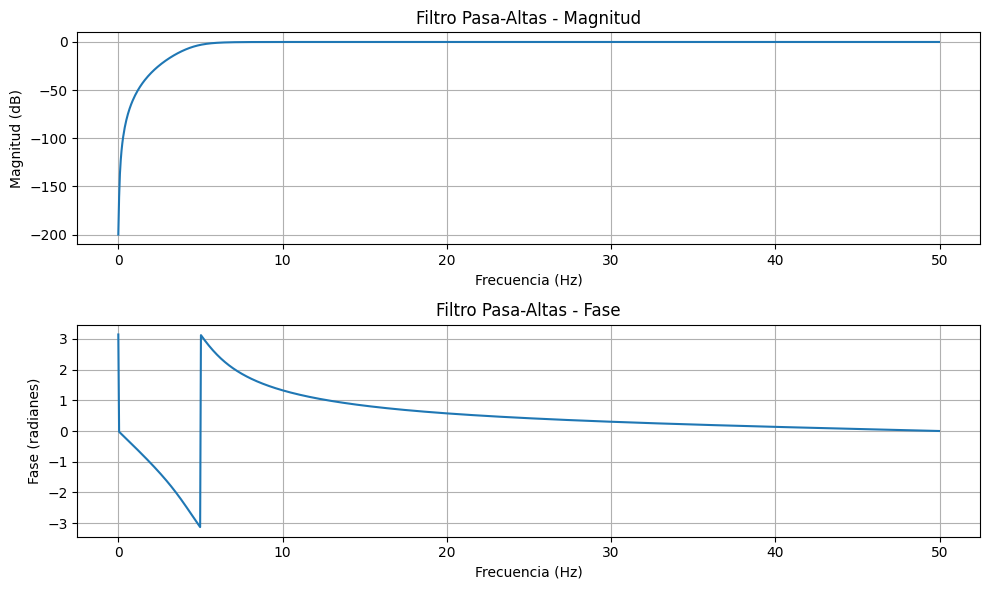

Primeros valores de la magnitud para Filtro Pasa-Bajas: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


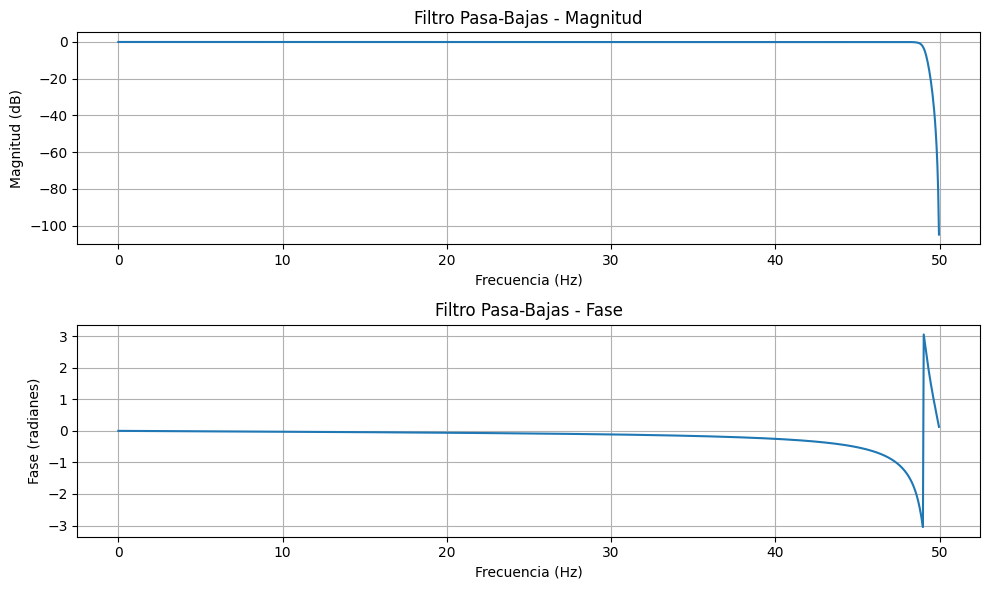

In [19]:
from scipy.signal import butter, freqz

fs = 100
a = 5
b = 49    # Frecuencia de corte pasa-bajas (Hz) ajustada para estar menor de Nyquist

# Filtro pasa-altas
def design_highpass(fc, fs, order=4):
    nyquist = fs / 2  # Frecuencia de Nyquist
    normalized_fc = fc / nyquist  # Frecuencia normalizada
    b, a = butter(order, normalized_fc, btype='high', analog=False)
    return b, a

# Filtro pasa-bajas
def design_lowpass(fc, fs, order=4):
    nyquist = fs / 2  # Frecuencia de Nyquist
    normalized_fc = fc / nyquist  # Frecuencia normalizada
    b, a = butter(order, normalized_fc, btype='low', analog=False)
    return b, a


def plot_filter_response(b, a, fs, title):
    w, h = freqz(b, a, worN=1024, fs=fs)
    magnitude = 20 * np.log10(np.maximum(np.abs(h), 1e-10))
    phase = np.angle(h)

    # Depuración: imprimir los primeros valores de la magnitud
    print(f"Primeros valores de la magnitud para {title}: {np.abs(h)[:10]}")

    plt.figure(figsize=(10, 6))
    plt.subplot(2, 1, 1)
    plt.plot(w, magnitude)
    plt.title(f'{title} - Magnitud')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Magnitud (dB)')
    plt.grid(True)

    plt.subplot(2, 1, 2)
    plt.plot(w, phase)
    plt.title(f'{title} - Fase')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Fase (radianes)')
    plt.grid(True)

    plt.tight_layout()
    plt.show()

# Diseñar el filtro pasa-altas
b_high, a_high = design_highpass(a, fs, order=4)

# Diseñar el filtro pasa-bajas
b_low, a_low = design_lowpass(b, fs, order=4)

# Graficar las respuestas
plot_filter_response(b_high, a_high, fs, 'Filtro Pasa-Altas')
plot_filter_response(b_low, a_low, fs, 'Filtro Pasa-Bajas')
